In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.
     ------------------------------------- 292.8/292.8 KB 90.4 kB/s eta 0:00:00



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

In [9]:
data= pd.read_csv('WHO-COVID-19-global-table-data.csv') #reading the dataset
data.head(20)

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
Global,NaN,500186525,6417.139459,6448828,82.735193,948865,6190349,79.419038,21480,0.275578,4175,NaN
United States of America,Americas,79716960,24083.481000,214867,64.914000,28845,979321,295.865000,3658,1.105000,776,NaN
India,South-East Asia,43039023,3118.760000,7065,0.512000,1007,521737,37.807000,207,0.015000,1,NaN
Brazil,Americas,30183929,14200.231000,143800,67.652000,22724,661493,311.204000,965,0.454000,166,NaN
France,Europe,26525319,40783.488000,901637,1386.294000,146307,140558,216.112000,852,1.310000,152,NaN
Germany,Europe,23182447,27874.671000,916659,1102.195000,165368,132688,159.545000,1652,1.986000,310,NaN
The United Kingdom,Europe,21715120,31987.624000,230030,338.847000,35836,171046,251.961000,1360,2.003000,651,NaN
Russian Federation,Europe,18041927,12363.034000,86807,59.484000,11348,372766,255.434000,1877,1.286000,254,NaN
Republic of Korea,Western Pacific,15979061,31166.989000,1200700,2341.953000,148443,20352,39.696000,1971,3.844000,318,NaN
Italy,Europe,15467395,25933.952000,431452,723.409000,62586,161187,270.260000,935,1.568000,155,NaN


In [12]:
data.shape

(238, 12)

In [13]:
data.describe()

,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
count,2.380000e+02,237.000000,2.380000e+02,237.000000,238.000000,2.380000e+02,237.000000,238.000000,237.000000,238.000000,0.0
mean,4.203248e+06,14461.142491,5.419183e+04,248.794081,7973.655462,5.201974e+04,109.830004,180.504202,0.574209,35.084034,NaN
std,3.304720e+07,15030.247719,4.343996e+05,704.944267,64033.589261,4.103113e+05,118.852491,1428.698537,1.583661,280.169421,NaN
min,0.000000e+00,0.000000,-4.000000e+00,-1.006000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.726925e+04,1185.381000,2.525000e+01,0.410000,0.000000,1.425000e+02,11.736000,0.000000,0.000000,0.000000,NaN
50%,1.595000e+05,9694.987000,2.830000e+02,11.918000,4.000000,1.466000e+03,68.545000,1.000000,0.015000,0.000000,NaN
75%,9.890312e+05,24083.481000,3.734000e+03,200.550000,369.000000,1.183250e+04,174.197000,21.750000,0.525000,2.000000,NaN
max,5.001865e+08,70926.021000,6.448828e+06,6518.365000,948865.000000,6.190349e+06,644.574000,21480.000000,18.117000,4175.000000,NaN


In [97]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

<b> Checking for columns with NaN values </b>

In [26]:
print("number of NaN values for the column Name :", data['Name'].isnull().sum())
print("number of NaN values for the column WHO Region:", data['WHO Region'].isnull().sum())
print("number of NaN values for the column Cases - cumulative total:", data['Cases - cumulative total'].isnull().sum())
print("number of NaN values for the column Cases - newly reported in last 7 days:", data['Cases - newly reported in last 7 days'].isnull().sum())
print("number of NaN values for the column Cases - newly reported in last 24 hours:", data['Cases - newly reported in last 24 hours'].isnull().sum())
print("number of NaN values for the column Deaths - cumulative total:", data['Deaths - cumulative total'].isnull().sum())
print("number of NaN values for the column Deaths - newly reported in last 7 days:", data['Deaths - newly reported in last 7 days'].isnull().sum())

number of NaN values for the column Name : 1
number of NaN values for the column WHO Region: 0
number of NaN values for the column Cases - cumulative total: 1
number of NaN values for the column Cases - newly reported in last 7 days: 1
number of NaN values for the column Cases - newly reported in last 24 hours: 0
number of NaN values for the column Deaths - cumulative total: 1
number of NaN values for the column Deaths - newly reported in last 7 days: 1


<b> drop off some columns </b>

In [30]:
data2 = data[['Deaths - cumulative total','Cases - cumulative total','Cases - newly reported in last 7 days', 'Cases - newly reported in last 24 hours']]
data2.head(10)

,Deaths - cumulative total,Cases - cumulative total,Cases - newly reported in last 7 days,Cases - newly reported in last 24 hours
Global,79.419038,6417.139459,82.735193,6190349
United States of America,295.865000,24083.481000,64.914000,979321
India,37.807000,3118.760000,0.512000,521737
Brazil,311.204000,14200.231000,67.652000,661493
France,216.112000,40783.488000,1386.294000,140558
Germany,159.545000,27874.671000,1102.195000,132688
The United Kingdom,251.961000,31987.624000,338.847000,171046
Russian Federation,255.434000,12363.034000,59.484000,372766
Republic of Korea,39.696000,31166.989000,2341.953000,20352
Italy,270.260000,25933.952000,723.409000,161187


In [34]:
# Checking for Columns with NaN in the selceted columns

print("Number of NaN values for the column Cases - cumulative total:", data2['Cases - cumulative total'].isnull().sum())
print("Number of NaN values for the column Cases - newly reported in last 7 days:", data2['Cases - newly reported in last 7 days'].isnull().sum())
print("Number of NaN values for the column Cases - newly reported in last 24 hours:", data2['Cases - newly reported in last 24 hours'].isnull().sum())
print("Number of NaN values for the column Deaths - cumulative total:", data2['Deaths - cumulative total'].isnull().sum())


Number of NaN values for the column Cases - cumulative total: 1
Number of NaN values for the column Cases - newly reported in last 7 days: 1
Number of NaN values for the column Cases - newly reported in last 24 hours: 0
Number of NaN values for the column Deaths - cumulative total: 1


In [196]:
#Eliminating NaN in columns

data2.replace('?',np.nan, inplace=True)
data2.dropna(inplace=True)

C:\Program Files\KMSpico\temp\ipykernel_7844\1529350916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.replace('?',np.nan, inplace=True)
C:\Program Files\KMSpico\temp\ipykernel_7844\1529350916.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.dropna(inplace=True)


In [36]:
print("Number of NaN values for the column Cases - cumulative total:", data2['Cases - cumulative total'].isnull().sum())
print("Number of NaN values for the column Cases - newly reported in last 7 days:", data2['Cases - newly reported in last 7 days'].isnull().sum())
print("Number of NaN values for the column Cases - newly reported in last 24 hours:", data2['Cases - newly reported in last 24 hours'].isnull().sum())
print("Number of NaN values for the column Deaths - cumulative total:", data2['Deaths - cumulative total'].isnull().sum())

Number of NaN values for the column Cases - cumulative total: 0
Number of NaN values for the column Cases - newly reported in last 7 days: 0
Number of NaN values for the column Cases - newly reported in last 24 hours: 0
Number of NaN values for the column Deaths - cumulative total: 0


Finding the linear regression

In [70]:
X = data2[['Cases - cumulative total']] 
Y = data2['Deaths - cumulative total'] 
lm = LinearRegression() 
lm 
lm.fit(X,Y)
lm.score(X, Y)

0.23403809868452674

In [39]:
X = data2[['Cases - cumulative total']] 
Y = data2['Deaths - cumulative total'] 
lm = LinearRegression() 
lm 
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5]

array([ 79.05786746, 146.64002507,  66.43999749, 108.83189385,
       210.52549352])

In [40]:
lm.intercept_

54.50925736772592

In [41]:
lm.coef_

array([0.00382548])

In [42]:
print(data2.dtypes)

Deaths - cumulative total                  float64
Cases - cumulative total                   float64
Cases - newly reported in last 7 days      float64
Cases - newly reported in last 24 hours      int64
dtype: object


In [43]:
data2['Deaths - cumulative total'] = data2['Deaths - cumulative total'].astype(float)
data2['Cases - cumulative total'] = data2['Cases - cumulative total'].astype(float)
data2['Cases - newly reported in last 7 days'] = data2['Cases - newly reported in last 7 days'].astype(float)
data2['Cases - newly reported in last 24 hours'] = data2['Cases - newly reported in last 24 hours'].astype(float)

C:\Program Files\KMSpico\temp\ipykernel_7844\446423244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Deaths - cumulative total'] = data2['Deaths - cumulative total'].astype(float)
C:\Program Files\KMSpico\temp\ipykernel_7844\446423244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Cases - cumulative total'] = data2['Cases - cumulative total'].astype(float)
C:\Program Files\KMSpico\temp\ipykernel_7844\446423244.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [44]:
print(data2.dtypes)

Deaths - cumulative total                  float64
Cases - cumulative total                   float64
Cases - newly reported in last 7 days      float64
Cases - newly reported in last 24 hours    float64
dtype: object


In [45]:
data2.corr()

,Deaths - cumulative total,Cases - cumulative total,Cases - newly reported in last 7 days,Cases - newly reported in last 24 hours
Deaths - cumulative total,1.000000,0.483775,-0.047586,0.049432
Cases - cumulative total,0.483775,1.000000,0.359795,-0.028601
Cases - newly reported in last 7 days,-0.047586,0.359795,1.000000,-0.024095
Cases - newly reported in last 24 hours,0.049432,-0.028601,-0.024095,1.000000


(0.0, 676.8027)

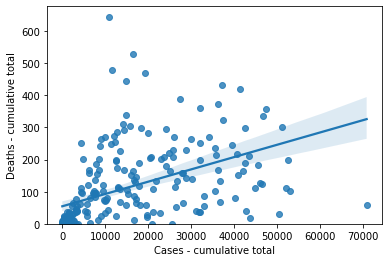

In [48]:
sns.regplot(x="Cases - cumulative total", y="Deaths - cumulative total", data=data2)
plt.ylim(0,)

<h> From the above graph, It shows that there a positve correlation between deaths cumulative and cases cumulative, meaning as the cases increase, deaths also increases </h>

In [50]:
data2[["Deaths - cumulative total", "Cases - cumulative total"]].corr()

,Deaths - cumulative total,Cases - cumulative total
Deaths - cumulative total,1.000000,0.483775
Cases - cumulative total,0.483775,1.000000


(0.0, 676.8027)

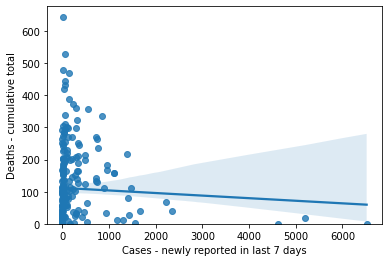

In [55]:
sns.regplot(x="Cases - newly reported in last 7 days", y="Deaths - cumulative total", data=data2)
plt.ylim(0,)

<h> From the graphs above, it shows the is a low correlation between deaths cumulative total and cases newly reported in last 7 days, showing that there are few cases reported in the last seven days </h>  

In [57]:
data2[["Deaths - cumulative total", "Cases - newly reported in last 7 days"]].corr()

,Deaths - cumulative total,Cases - newly reported in last 7 days
Deaths - cumulative total,1.000000,-0.047586
Cases - newly reported in last 7 days,-0.047586,1.000000


(0.0, 5074.115648641608)

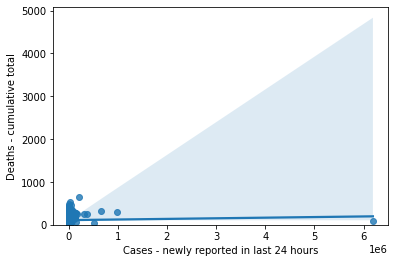

In [56]:
sns.regplot(x="Cases - newly reported in last 24 hours", y="Deaths - cumulative total", data=data2)
plt.ylim(0,)

<h> From the regression plot above, it shows there is weak correlation between deaths cumulative and cases newly reported in last 24 hours, showing very few newly reported cases in 24 hours does not affect much on the deaths cumulative total. </h>

In [58]:
data2[["Deaths - cumulative total", "Cases - newly reported in last 24 hours"]].corr()

,Deaths - cumulative total,Cases - newly reported in last 24 hours
Deaths - cumulative total,1.000000,0.049432
Cases - newly reported in last 24 hours,0.049432,1.000000


In [60]:
data.replace('?',np.nan, inplace=True)
data.dropna(inplace=True)

In [63]:
print("number of NaN values for the column Name :", data['Name'].isnull().sum())
print("number of NaN values for the column WHO Region:", data['WHO Region'].isnull().sum())
print("number of NaN values for the column Cases - cumulative total:", data['Cases - cumulative total'].isnull().sum())
print("number of NaN values for the column Cases - newly reported in last 7 days:", data['Cases - newly reported in last 7 days'].isnull().sum())
print("number of NaN values for the column Cases - newly reported in last 24 hours:", data['Cases - newly reported in last 24 hours'].isnull().sum())
print("number of NaN values for the column Deaths - cumulative total:", data['Deaths - cumulative total'].isnull().sum())
print("number of NaN values for the column Deaths - newly reported in last 7 days:", data['Deaths - newly reported in last 7 days'].isnull().sum())

number of NaN values for the column Name : 0
number of NaN values for the column WHO Region: 0
number of NaN values for the column Cases - cumulative total: 0
number of NaN values for the column Cases - newly reported in last 7 days: 0
number of NaN values for the column Cases - newly reported in last 24 hours: 0
number of NaN values for the column Deaths - cumulative total: 0
number of NaN values for the column Deaths - newly reported in last 7 days: 0


In [77]:
dd = data2[['Cases - cumulative total', 'Cases - newly reported in last 7 days', 'Cases - newly reported in last 24 hours']]
lm.fit(dd, data2['Deaths - cumulative total'])

LinearRegression()

In [78]:
lm.intercept_

53.6140380293612

In [79]:
lm.coef_

array([ 4.56068175e-03, -4.27661012e-02,  1.72906747e-05])

In [84]:
lm.fit(dd, data2['Deaths - cumulative total'])
# Find the R^2
print('The R-square is: ', lm.score(dd, data2['Deaths - cumulative total']))

The R-square is:  0.2940445544941055


In [87]:
#R - squared

X = data2[['Cases - cumulative total']] 
Y = data2['Deaths - cumulative total'] 
lm = LinearRegression() 
lm 
lm.fit(X,Y)
lm.score(X, Y)

0.23403809868452674

In [88]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [ 79.05786746 146.64002507  66.43999749 108.83189385]


In [93]:
# Mean Squared error

mse = mean_squared_error(data2['Deaths - cumulative total'], Yhat)
print('The mean square error of deaths cummulative total and predicted value is: ', mse)

The mean square error of deaths cummulative total and predicted value is:  10774.258770748162


In [94]:
lm.fit(dd, data2['Deaths - cumulative total'])
# Find the R^2
print('The R-square is: ', lm.score(dd, data2['Deaths - cumulative total']))

The R-square is:  0.2940445544941055


In [96]:
Y_predict_multifit = lm.predict(dd)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(data2['Deaths - cumulative total'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  9930.189265858278


In [112]:
from sklearn.preprocessing import StandardScaler
X_initial = X
scaler = preprocessing.StandardScaler().fit(X_initial)
X= scaler.transform(X)
X[0:10]

array([[-0.53632033],
       [ 0.64155318],
       [-0.75623421],
       [-0.01739583],
       [ 1.75499797],
       [ 0.89432438],
       [ 1.16854858],
       [-0.13988784],
       [ 1.11383413],
       [ 0.76493021]])

In [120]:
y = data2['Deaths - cumulative total'].values
y[0:5]

array([ 79.41903839, 295.865     ,  37.807     , 311.204     ,
       216.112     ])

<b> KNN </b>

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split( X, y, test_size=0.25, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Cross validation set:', X_cv.shape,  y_cv.shape)

Train set: (177, 1) (177,)
Cross validation set: (60, 1) (60,)


In [125]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [126]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [151]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model   
    knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train,y_train)
 
mean_acc

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

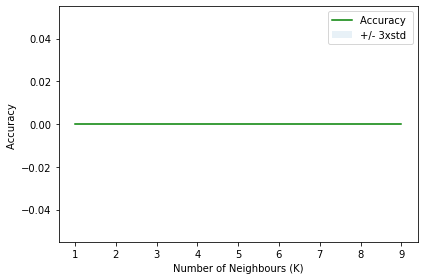

The best accuracy was 0.0 with k= 1


In [152]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [154]:
datar = {'Jaccard': [0, 0, 0, 0], 'F1-score': [0, 0, 0, 0], 'LogLoss': ['NA', 'NA', 'NA', 0]}
data_report = pd.DataFrame (data=datar, index=['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'])
data_report

,Jaccard,F1-score,LogLoss
KNN,0,0,NA
Decision Tree,0,0,NA
SVM,0,0,NA
LogisticRegression,0,0,0


In [158]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.53632033],
       [ 0.64155318],
       [-0.75623421],
       [-0.01739583],
       [ 1.75499797]])

<b> Decision Tree </b>

In [170]:
pip install six

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [171]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from six import StringIO

In [174]:
pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 278.7/278.7 KB 122.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=f154a344117e6922736f6a4293048efc070fd7626cfafd2cbf6762f8dace74ea
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\69\b2\67\08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [212]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [213]:
CovidTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
CovidTree

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [214]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.25641303, -0.53632033],
       [ 1.56857226,  0.64155318],
       [-0.60726901, -0.75623421],
       [ 1.69790454, -0.01739583],
       [ 0.89612704,  1.75499797]])

In [226]:
dot_data2 = StringIO()
filename = "TCtree.png"
featureNames = Feature.columns
targetNames = data2['Deaths - cumulative total'].tolist()
out=tree.export_graphviz(CovidTree,feature_names=featureNames, out_file=dot_data2, class_names= np.unique(y), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

TypeError: '_io.StringIO' object is not subscriptable